In [60]:
import pandas as pd
import ssl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [163]:
# Creates a dataframe similar to the arrest-data dataframe.
# Each letter ("a", "b", "c") represents a neighborhood.

dict_arrest = [
    {"Neighborhood" : "a"},
    {"Neighborhood" : "a"},
    {"Neighborhood" : "b"},
    {"Neighborhood" : "c"}
]

df_arrest = pd.DataFrame(dict_arrest)
df_arrest.head()

,Neighborhood
0,a
1,a
2,b
3,c


In [164]:
# Creates a series "a" that sorts the dataframe by letter and counts how many instances of that letter appear in the dataframe. 
a = df_arrest["Neighborhood"].value_counts()

# This sorted series can then be converted into a dataframe.
df_a = pd.DataFrame(a)
df_a = df_a.rename(columns = {'Neighborhood':'Count'}) #Renames the "Neighborhood" column to "Count"
df_a.head()

,Count
a,2
c,1
b,1


In [148]:
# However, we still need an index or ranking data for each letter. reset_index() allows us to create this index.
df_a  = df_a.reset_index().rename(columns = {"index":"Neighborhood"}) #Renames the "index" column to "Neighborhood".
df_a .head()

,Neighborhood,Count
0,a,2
1,c,1
2,b,1


In [216]:
# Creates a dataframe similar to the population-density dataframe.
dict_pop = [
    {"Neighborhood" : "a", "Population" : 100},
    {"Neighborhood" : "b", "Population" : 200},
    {"Neighborhood" : "c", "Population" : 300}
]

df_pop = pd.DataFrame(dict_pop)
df_pop.head()

,Neighborhood,Population
0,a,100
1,b,200
2,c,300


In [150]:
# Merge the two dataframes
df_merge = pd.merge(df_a, df_pop)
df_merge.head()

,Neighborhood,Count,Population
0,a,2,100
1,c,1,300
2,b,1,200


In [151]:
# Creates a new column "Rank" which divides 
df_merge["Rank"] = df_merge["Count"]/df_merge["Population"]
df_merge.head()

,Neighborhood,Count,Population,Rank
0,a,2,100,0.020000
1,c,1,300,0.003333
2,b,1,200,0.005000


In [153]:
# This process can be repeated for another database (like fire incident data)


In [155]:
# The index can also be shifted
df_merge.index = df_merge.index + 1
df_merge.head()

,Neighborhood,Count,Population,Rank
2,a,2,100,0.020000
3,c,1,300,0.003333
4,b,1,200,0.005000


In [40]:
#Function for the above steps

def makeDF(df1, neighborhood1, count1, df2, neighborhood2, count2, pop, index_increment): 
    
    # df1 and df2 are dataframes
    # neighborhood1 and neighborhood2 are the 'neighborhood' column titles
    # count1 and count2 are the count column titles
    #pop is the population dataframe
    # index_increment is the optional for changing the index
    
    # Makes adjustments to df1
    a = df1[neighborhood1].value_counts()
    df_a = pd.DataFrame(a)
    df_a = df_a.rename(columns = {neighborhood1 : count1})
    df_a  = df_a.reset_index().rename(columns = {"index" : "Neighborhood"})
    
    # Makes adjustments to df2
    b = df2[neighborhood2].value_counts()
    df_b = pd.DataFrame(b)
    df_b = df_b.rename(columns = {neighborhood2 : count2})
    df_b  = df_b.reset_index().rename(columns = {"index" : "Neighborhood"})
    
    #Makes adjustmets to pop
    c = population_records[["Neighborhood", "Pop. 2010"]]
    c["Pop. 2010"] = c["Pop. 2010"].str.replace(',', '')
    c["Pop. 2010"] = c["Pop. 2010"].astype(int)
    
    #Merges df1, df2, pop
    temp = pd.merge(df_a, df_b)
    df_merge = pd.merge(temp,c)
    
    df_merge["Rank"] = (df_merge[count1]/df_merge["Pop. 2010"] + df_merge[count2]/df_merge["Pop. 2010"]) / 2
    df_merge = df_merge.sort_values(by = ["Rank"])
    df_merge = df_merge.reset_index(drop = True)
    df_merge.index = df_merge.index + index_increment

    return df_merge

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


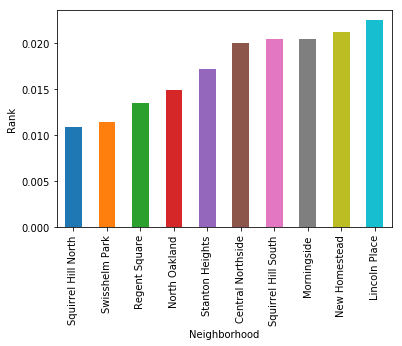

In [62]:
arrest_records = pd.read_csv("arrest-data.csv")
fire_records = pd.read_csv("fire-incident-data.csv")
population_records = pd.read_csv("population-density.csv")

df = makeDF(arrest_records, "INCIDENTNEIGHBORHOOD", "Arrest Count", fire_records, "neighborhood", "Fire Count", population_records, 0).head(100)

df = df.set_index(["Neighborhood"])

df["Rank"].head(10).plot(kind='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Rank");